<a href="https://colab.research.google.com/github/marcosoares-92/IndustrialDataScienceWorkflow/blob/main/model_project/steel_industry_energy_consumption/cycle2_etl_2_Dataset_Characterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Characterization**

## _ETL Workflow Notebook 2_

## Content:
1. Dataframe general characterization; 
2. Characterizing categorical variables;
3. Removing all columns and rows that contain only missing values;
4. Visualizing and characterizing distribution of missing values;
5. Visualizing missingness across a variable, and comparing it to another variable (both numeric);
6. Dealing with missing values; 
7. Obtaining the correlation plot;
8. Plotting bar charts;
9. Calculating cumulative statistics; 
10. Obtaining scatter plots and simple linear regressions;
11. Performing the polynomial fitting; 
12. Visualizing time series; 
13. Visualizing histograms; 
14. Testing normality and visualizing the probability plot;
15. Testing and visualizing probability plots for different statistical distributions;
16. Filtering (selecting); ordering; or renaming columns from the dataframe;
17. Renaming specific columns from the dataframe; or cleaning columns' labels;
18. Dropping specific columns or rows from the dataframe; 
19. Removing duplicate rows from the dataframe.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [ ]:
# Run installed library
import numpy as np
import pandas as pd
import idsw
from idsw import etl
from idsw.etl import etl_workflow as ewf

In [ ]:
# Run Python files
import numpy as np
import pandas as pd
import idsw
from etl import etl_workflow as ewf

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [ ]:
SOURCE = 'google'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
idsw.mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

Associate the Python environment to your Google Drive account, and authorize the access in the opened window.
Mounted at /content/drive
Now your Python environment is connected to your Google Drive: the root directory of your environment is now the root of your Google Drive.
In Google Colab, navigate to the folder icon ('Files') of the left navigation menu to find a specific folder or file in your Google Drive.
Click on the folder or file name and select the elipsis (...) icon on the right of the name to reveal the option 'Copy path', which will give you the path to use as input for loading objects and files on your Python environment.
Caution: save your files into different directories of the Google Drive. If files are all saved in a same folder or directory, like the root path, they may not be accessible from your Python environment.
If you still cannot see the file after moving it to a different folder, reload the environment.


### **Importing the dataset**

In [ ]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "steel_industry_grouped_30h_avg.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.34 ms
Type conversion took: 2.19 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/steel_industry_grouped_30h_avg.csv. Check the 10 first rows of this dataframe:



,timestamp_grouped,Usage_kWh_mean,Lagging_Current_Reactive.Power_kVarh_mean,Leading_Current_Reactive_Power_kVarh_mean,CO2(tCO2)_mean,Lagging_Current_Power_Factor_mean,Leading_Current_Power_Factor_mean,NSM_mean,WeekStatus_mode,Day_of_week_mode,Load_Type_mode,year,month,week,day
0,2018-01-01 00:00:00,8.136750,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,Weekday,Monday,Light_Load,2018,1,1,1
1,2018-01-02 06:00:00,52.971167,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,Weekday,Thursday,Light_Load,2018,1,1,2
2,2018-01-03 12:00:00,8.528167,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,Weekend,Sunday,Light_Load,2018,1,1,3
3,2018-01-04 18:00:00,3.109167,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,Weekday,Tuesday,Light_Load,2018,1,1,4
4,2018-01-06 00:00:00,17.667167,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,Weekday,Friday,Light_Load,2018,1,1,6
5,2018-01-07 06:00:00,2.919500,1.941167,8.969417,0.000000,79.630083,56.142750,40590.0,Weekend,Sunday,Light_Load,2018,1,1,7
6,2018-01-08 12:00:00,11.701583,4.221583,6.002417,0.004000,81.949833,71.512000,44910.0,Weekend,Saturday,Light_Load,2018,1,2,8
7,2018-01-09 18:00:00,19.334250,11.358417,2.933583,0.007833,74.765583,85.589917,49230.0,Weekday,Monday,Medium_Load,2018,1,2,9
8,2018-01-11 00:00:00,24.649333,13.786833,2.857833,0.010083,78.643500,88.090083,36270.0,Weekday,Thursday,Light_Load,2018,1,2,11
9,2018-01-12 06:00:00,17.879250,5.814083,6.602500,0.006333,89.418750,76.928667,40590.0,Weekend,Saturday,Light_Load,2018,1,2,12


### **Characterizing the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

#New dataframes saved as df_shape, df_columns_list, df_dtypes, df_general_statistics, df_missing_values.
# Simply modify this object on the left of equality:
df_shape, df_columns_array, df_dtypes, df_general_statistics, df_missing_values = ewf.df_general_characterization (df = DATASET)

Dataframe's 10 first rows:



,timestamp_grouped,Usage_kWh_mean,Lagging_Current_Reactive.Power_kVarh_mean,Leading_Current_Reactive_Power_kVarh_mean,CO2(tCO2)_mean,Lagging_Current_Power_Factor_mean,Leading_Current_Power_Factor_mean,NSM_mean,WeekStatus_mode,Day_of_week_mode,Load_Type_mode,year,month,week,day
0,2018-01-01 00:00:00,8.136750,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,Weekday,Monday,Light_Load,2018,1,1,1
1,2018-01-02 06:00:00,52.971167,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,Weekday,Thursday,Light_Load,2018,1,1,2
2,2018-01-03 12:00:00,8.528167,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,Weekend,Sunday,Light_Load,2018,1,1,3
3,2018-01-04 18:00:00,3.109167,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,Weekday,Tuesday,Light_Load,2018,1,1,4
4,2018-01-06 00:00:00,17.667167,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,Weekday,Friday,Light_Load,2018,1,1,6
5,2018-01-07 06:00:00,2.919500,1.941167,8.969417,0.000000,79.630083,56.142750,40590.0,Weekend,Sunday,Light_Load,2018,1,1,7
6,2018-01-08 12:00:00,11.701583,4.221583,6.002417,0.004000,81.949833,71.512000,44910.0,Weekend,Saturday,Light_Load,2018,1,2,8
7,2018-01-09 18:00:00,19.334250,11.358417,2.933583,0.007833,74.765583,85.589917,49230.0,Weekday,Monday,Medium_Load,2018,1,2,9
8,2018-01-11 00:00:00,24.649333,13.786833,2.857833,0.010083,78.643500,88.090083,36270.0,Weekday,Thursday,Light_Load,2018,1,2,11
9,2018-01-12 06:00:00,17.879250,5.814083,6.602500,0.006333,89.418750,76.928667,40590.0,Weekend,Saturday,Light_Load,2018,1,2,12




Dataframe's 10 last rows:



,timestamp_grouped,Usage_kWh_mean,Lagging_Current_Reactive.Power_kVarh_mean,Leading_Current_Reactive_Power_kVarh_mean,CO2(tCO2)_mean,Lagging_Current_Power_Factor_mean,Leading_Current_Power_Factor_mean,NSM_mean,WeekStatus_mode,Day_of_week_mode,Load_Type_mode,year,month,week,day
282,2018-12-19 12:00:00,37.997167,16.820333,4.409000,0.016667,90.258750,85.930833,44910.0,Weekday,Thursday,Medium_Load,2018,12,51,19
283,2018-12-20 18:00:00,20.196500,8.251583,6.503833,0.007833,90.320417,77.140750,49230.0,Weekday,Friday,Light_Load,2018,12,51,20
284,2018-12-22 00:00:00,3.798167,1.596917,7.209917,0.000000,88.438167,66.241333,36270.0,Weekend,Saturday,Light_Load,2018,12,51,22
285,2018-12-23 06:00:00,10.476500,4.154500,7.103167,0.003250,90.814833,66.346667,40590.0,Weekend,Sunday,Light_Load,2018,12,51,23
286,2018-12-24 12:00:00,10.181750,2.542417,9.046750,0.003167,92.341750,62.118083,44910.0,Weekday,Tuesday,Light_Load,2018,12,52,24
287,2018-12-25 18:00:00,17.461583,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,Weekday,Wednesday,Light_Load,2018,12,52,25
288,2018-12-27 00:00:00,22.575917,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,Weekday,Thursday,Light_Load,2018,12,52,27
289,2018-12-28 06:00:00,16.224500,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,Weekday,Friday,Light_Load,2018,12,52,28
290,2018-12-29 12:00:00,3.579417,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,Weekend,Sunday,Light_Load,2018,12,52,29
291,2018-12-30 18:00:00,3.521417,1.073500,9.400083,0.000000,91.637583,54.594583,49230.0,Weekday,Monday,Light_Load,2018,12,52,30




Dataframe's shape = (number of rows, number of columns) =



(292, 15)



Dataframe's columns =



Index(['timestamp_grouped', 'Usage_kWh_mean',
       'Lagging_Current_Reactive.Power_kVarh_mean',
       'Leading_Current_Reactive_Power_kVarh_mean', 'CO2(tCO2)_mean',
       'Lagging_Current_Power_Factor_mean',
       'Leading_Current_Power_Factor_mean', 'NSM_mean', 'WeekStatus_mode',
       'Day_of_week_mode', 'Load_Type_mode', 'year', 'month', 'week', 'day'],
      dtype='object')



Dataframe's variables types:



dataframe_column
timestamp_grouped                             object
Usage_kWh_mean                               float64
Lagging_Current_Reactive.Power_kVarh_mean    float64
Leading_Current_Reactive_Power_kVarh_mean    float64
CO2(tCO2)_mean                               float64
Lagging_Current_Power_Factor_mean            float64
Leading_Current_Power_Factor_mean            float64
NSM_mean                                     float64
WeekStatus_mode                               object
Day_of_week_mode                              object
Load_Type_mode                                object
year                                           int64
month                                          int64
week                                           int64
day                                            int64
Name: dtype_series, dtype: object



Dataframe's general (summary) statistics for numeric variables:



dataframe_column,Usage_kWh_mean,Lagging_Current_Reactive.Power_kVarh_mean,Leading_Current_Reactive_Power_kVarh_mean,CO2(tCO2)_mean,Lagging_Current_Power_Factor_mean,Leading_Current_Power_Factor_mean,NSM_mean,year,month,week,day
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,2018.0,6.510274,26.500000,15.695205
std,13.843678,6.601328,2.612382,0.006606,5.909322,12.509709,4838.198523,0.0,3.447679,15.075184,8.798210
min,2.725583,0.979417,0.026417,0.000000,66.166583,49.373167,36270.000000,2018.0,1.000000,1.000000,1.000000
25%,18.591917,7.895708,1.870250,0.007229,76.075250,76.743396,39510.000000,2018.0,4.000000,13.750000,8.000000
50%,27.812500,13.574667,2.921917,0.011833,80.648583,88.194500,42750.000000,2018.0,7.000000,26.500000,16.000000
75%,36.007417,17.833813,5.687583,0.015667,85.136833,94.233271,45990.000000,2018.0,9.250000,39.250000,23.000000
max,81.891417,35.173250,13.188583,0.037500,92.688333,99.999333,49230.000000,2018.0,12.000000,52.000000,31.000000




Missing values on each feature; and missingness considering all rows from the dataframe:
(note: 'missingness_accross_rows' was calculated by: checking which rows have at least one missing value (NA); and then comparing total rows with NAs with total rows in the dataframe).



,count_of_missing_values,proportion_of_missing_values,percent_of_missing_values
dataframe_column,,,
timestamp_grouped,0,0.0,0.0
Usage_kWh_mean,0,0.0,0.0
Lagging_Current_Reactive.Power_kVarh_mean,0,0.0,0.0
Leading_Current_Reactive_Power_kVarh_mean,0,0.0,0.0
CO2(tCO2)_mean,0,0.0,0.0
Lagging_Current_Power_Factor_mean,0,0.0,0.0
Leading_Current_Power_Factor_mean,0,0.0,0.0
NSM_mean,0,0.0,0.0
WeekStatus_mode,0,0.0,0.0


### **Characterizing the categorical variables**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

TIMESTAMP_TAG_COLUMN = "timestamp_grouped"
# TIMESTAMP_TAG_COLUMN: name (header) of the column containing the timestamps. 
# Keep TIMESTAMP_TAG_COLUMN = None if the dataframe do not contain timestamps.

# Dataframe with summary from the categorical variables returned as cat_vars_summary. 
# Simply modify this object on the left of equality:
cat_vars_summary = ewf.characterize_categorical_variables (df = DATASET, timestamp_tag_column = TIMESTAMP_TAG_COLUMN)



Finished analyzing the categorical variables. Check the summary dataframe:



,value,counts_of_occurences,percent_of_occurences,categorical_variable
0,NaN,0,0.000000,WeekStatus_mode
1,Weekday,207,70.890411,WeekStatus_mode
2,Weekend,85,29.109589,WeekStatus_mode
3,NaN,0,0.000000,Day_of_week_mode
4,Monday,43,14.726027,Day_of_week_mode
5,Thursday,40,13.698630,Day_of_week_mode
6,Sunday,43,14.726027,Day_of_week_mode
7,Tuesday,42,14.383562,Day_of_week_mode
8,Friday,42,14.383562,Day_of_week_mode
9,Saturday,42,14.383562,Day_of_week_mode


### **Removing all columns and rows that contain only missing values**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

LIST_OF_COLUMNS_TO_IGNORE = None
# list_of_columns_to_ignore: if you do not want to check a specific column, pass its name
# (header) as an element from this list. It should be declared as a list even if it contains
# a single value.
# e.g. list_of_columns_to_ignore = ['column1'] will not analyze missing values in column named
# 'column1'; list_of_columns_to_ignore = ['col1', 'col2'] will ignore columns 'col1' and 'col2'

# Cleaned dataframe returned as cleaned_df. 
# Simply modify this object on the left of equality:
cleaned_df = ewf.remove_completely_blank_rows_and_columns (df = DATASET, list_of_columns_to_ignore = LIST_OF_COLUMNS_TO_IGNORE)

0 rows were completely blank and were removed.

0 columns were completely blank and were removed.

No blank columns or rows were found. Returning the original dataframe.



### **Visualizing and characterizing distribution of missing values**

Possible reasons for missing data:

One of the obvious reasons is that data is simply missing at random.
Other reasons might be that the missingness is dependent on another variable;
or it is due to missingness of the same variables or other variables.

Types of missingness:

Identifying the missingness type helps narrow down the methodologies that you can use for treating missing data.
We can group the missingness patterns into 3 broad categories:

Missing Completely at Random (MCAR)

Missingness has no relationship between any values, observed or missing.
Example: consider you have a class of students. There are a few students absent on any given day. The students are absent just randomly for their specific reasons. This is missing completely at random.

Missing at Random (MAR)

There is a systematic relationship between missingness and other observed data, but not the missing data.
Example: consider the attendance in a classroom of students during winter, where many students are abs

292



Missing values on each feature; and missingness considering all rows from the dataframe:
(note: 'missingness_accross_rows' was calculated by: checking which rows have at least one missing value (NA); and then comparing total rows with NAs with total rows in the dataframe).



,count_of_missing_values,proportion_of_missing_values,percent_of_missing_values
dataframe_column,,,
timestamp_grouped,0,0.0,0.0
Usage_kWh_mean,0,0.0,0.0
Lagging_Current_Reactive.Power_kVarh_mean,0,0.0,0.0
Leading_Current_Reactive_Power_kVarh_mean,0,0.0,0.0
CO2(tCO2)_mean,0,0.0,0.0
Lagging_Current_Power_Factor_mean,0,0.0,0.0
Leading_Current_Power_Factor_mean,0,0.0,0.0
NSM_mean,0,0.0,0.0
WeekStatus_mode,0,0.0,0.0




Bar chart of the missing values - Nullity bar:



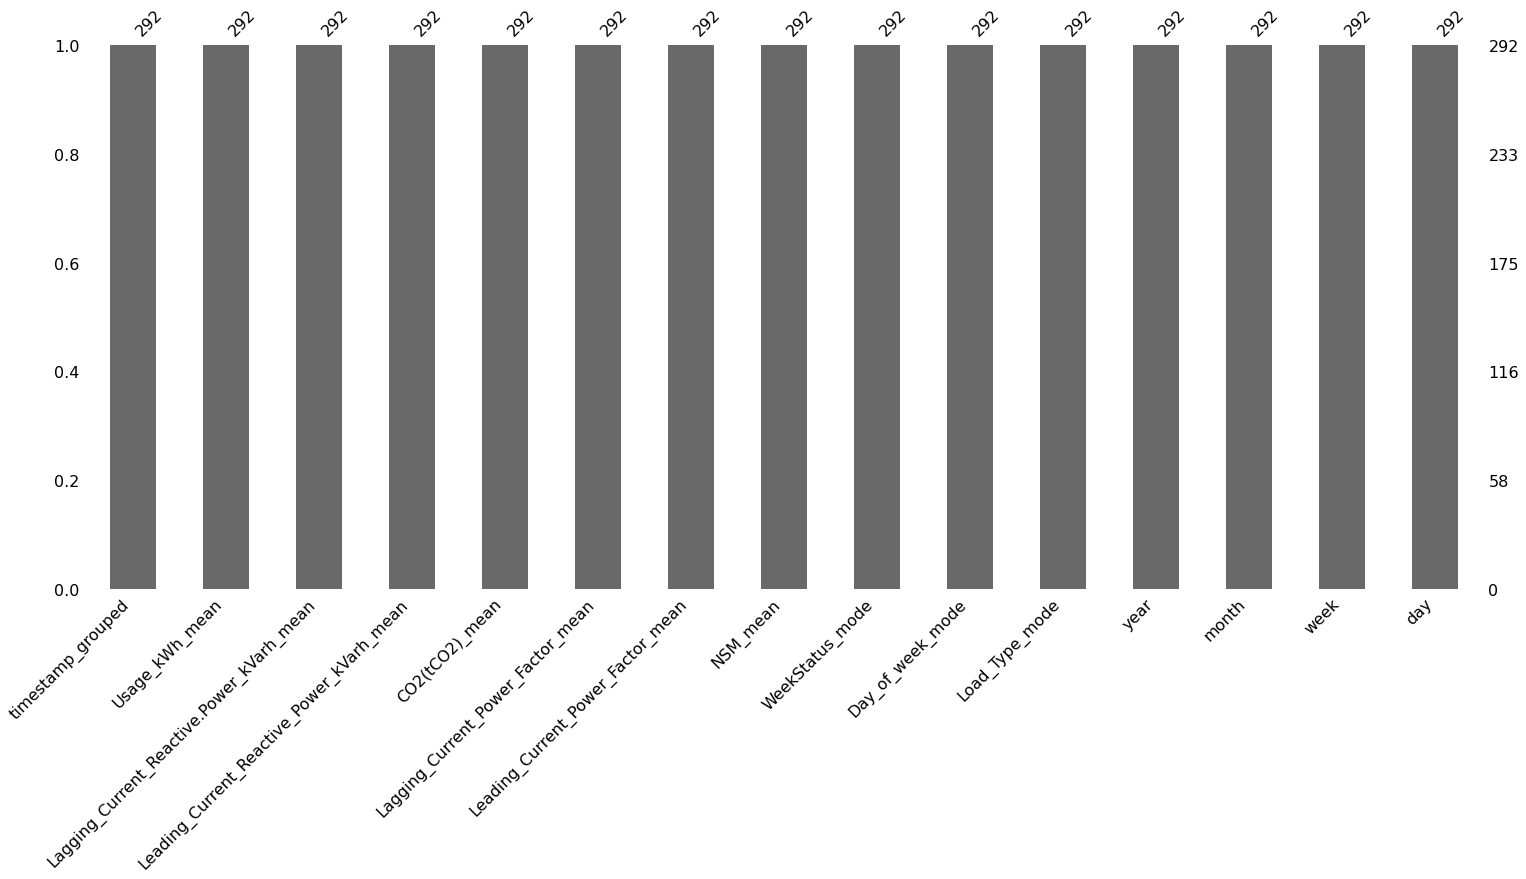



The nullity bar allows us to visualize the completeness of the dataframe.

Nullity Matrix: distribution of missing values through the dataframe:



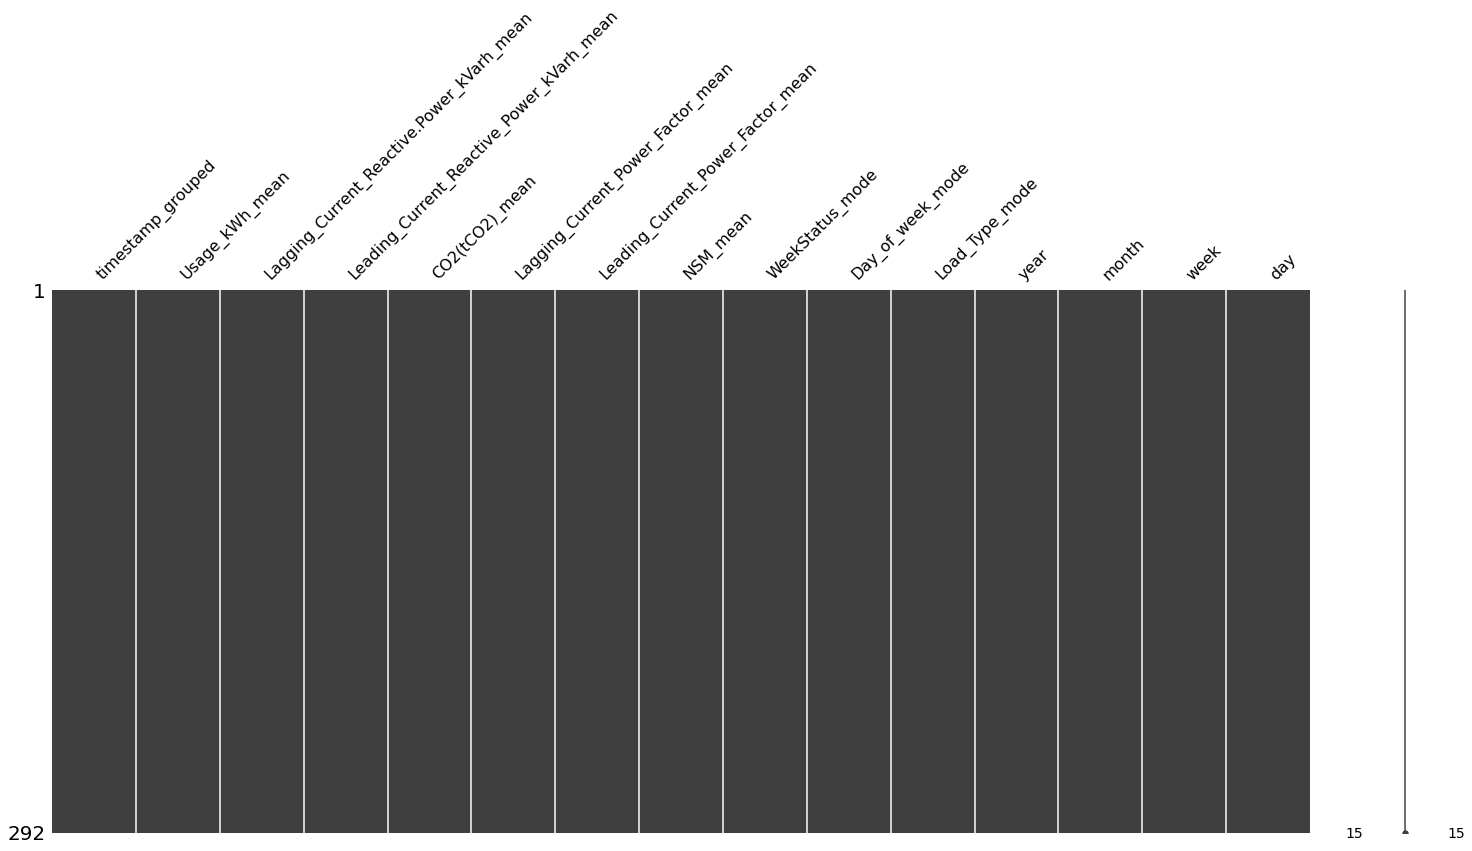



The nullity matrix allows us to visualize the location of missing values in the dataset.
The nullity matrix describes the nullity in the dataset and appears blank wherever there are missing values.
It allows us to quickly analyze the patterns in missing values.
The sparkline on the right of the matrix summarizes the general shape of data completeness and points out the row with the minimum number of null values in the dataframe.
In turns, the nullity matrix shows the total counts of columns at its bottom.
We can previously slice the dataframe for a particular interval of analysis (e.g. slice the time interval) to obtain more clarity on the amount of missingness.
Slicing will be particularly helpful when analyzing large datasets.

MCAR: plotting the missingness matrix plot (nullity matrix) for a MCAR variable will show values missing at random, with no correlation or clear pattern.
Correlation here implies the dependency of missing values on another variable present or absent.

MAR: t

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


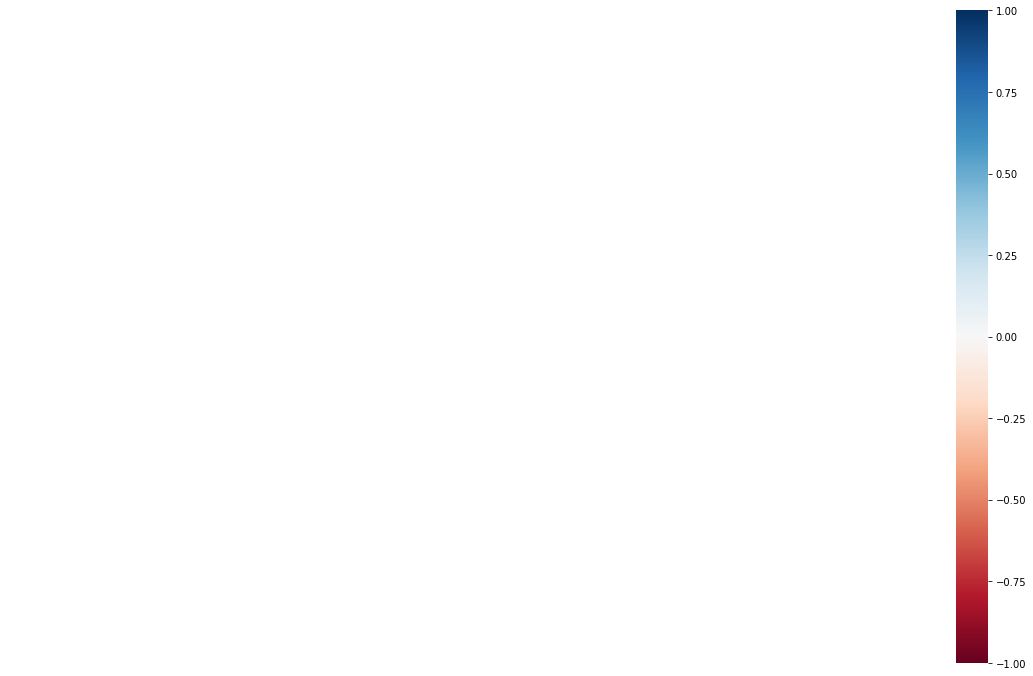



The missingness heatmap describes the correlation of missingness between columns.
The heatmap is a graph of correlation of missing values between columns.
It explains the dependencies of missingness between columns.
In simple terms, if the missingness for two columns are highly correlated, then the heatmap will show high values of coefficient of correlation R2 for them.
That is because columns where the missing values co-occur the maximum are highly related and vice-versa.

In the graph, the redder the color, the lower the correlation between the missing values of the columns.
In turns, the bluer the color, the higher the correlation of missingness between the two variables.

ATTENTION: before deciding if the missing values in one variable is correlated with other, so that they would be characterized as MAR or MNAR, check the total of missing values.
Even if the heatmap shows a certain degree of correlation, the number of missing values may be too small to substantiate that.
Missingn

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


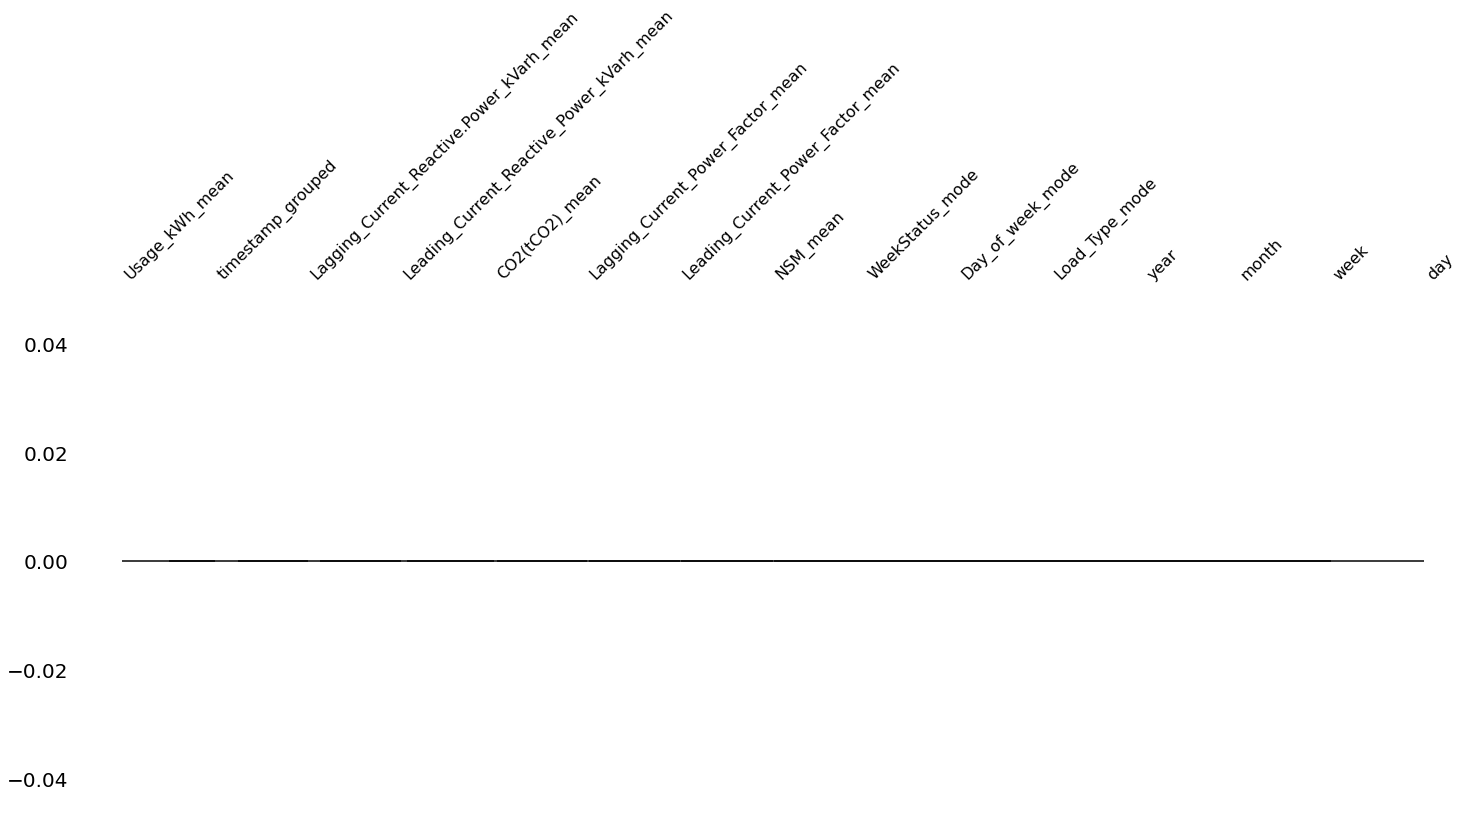



A dendrogram is a tree diagram that groups similar objects in close branches.
So, the missingness dendrogram is a tree diagram of missingness that describes correlation of variables by grouping similarly missing columns together.
To interpret this graph, read it from a top-down perspective.
Cluster leaves which are linked together at a distance of zero fully predict one another's presence.
In other words, when two variables are grouped together in the dendogram, one variable might always be empty while another is filled (the presence of one explains the missingness of the other), or they might always both be filled or both empty, and so on (the missingness of one explains the missigness of the other).



In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SLICE_TIME_WINDOW_FROM = None
SLICE_TIME_WINDOW_TO = None    
# SLICE_TIME_WINDOW_FROM and SLICE_TIME_WINDOW_TO (timestamps). When analyzing time series,
# use these parameters to observe only values in a given time range.
    
# SLICE_TIME_WINDOW_FROM: the inferior limit of the analyzed window. If you declare this value
# and keep SLICE_TIME_WINDOW_TO = None, then you will analyze all values that comes after
# SLICE_TIME_WINDOW_FROM.
# SLICE_TIME_WINDOW_TO: the superior limit of the analyzed window. If you declare this value
# and keep SLICE_TIME_WINDOW_FROM = None, then you will analyze all values until
# SLICE_TIME_WINDOW_TO.
# If SLICE_TIME_WINDOW_FROM = SLICE_TIME_WINDOW_TO = None, only the standard analysis with
# the whole dataset will be performed. If both values are specified, then the specific time
# window from 'SLICE_TIME_WINDOW_FROM' to 'SLICE_TIME_WINDOW_TO' will be analyzed.
# e.g. SLICE_TIME_WINDOW_FROM = 'May-1976', and SLICE_TIME_WINDOW_TO = 'Jul-1976'
# Notice that the timestamps must be declares in quotes, just as strings.

AGGREGATE_TIME_IN_TERMS_OF = None    
# AGGREGATE_TIME_IN_TERMS_OF = None. Keep it None if you do not want to aggregate the time
# series. Alternatively, set AGGREGATE_TIME_IN_TERMS_OF = 'Y' or AGGREGATE_TIME_IN_TERMS_OF = 
# 'year' to aggregate the timestamps in years; set AGGREGATE_TIME_IN_TERMS_OF = 'M' or
# 'month' to aggregate in terms of months; or set AGGREGATE_TIME_IN_TERMS_OF = 'D' or 'day'
# to aggregate in terms of days.

# Dataframes containing total of missing values and percent of missing values for each variable
# returned as total_of_missing_values and percent_of_missing_values.
# Simply modify these objects on the left of equality:
df_missing_values = ewf.visualize_and_characterize_missing_values (df = DATASET, slice_time_window_from = SLICE_TIME_WINDOW_FROM, slice_time_window_to = SLICE_TIME_WINDOW_TO, aggregate_time_in_terms_of = AGGREGATE_TIME_IN_TERMS_OF)

## There are no missing values in this dataframe

### **Obtaining the correlation plot**

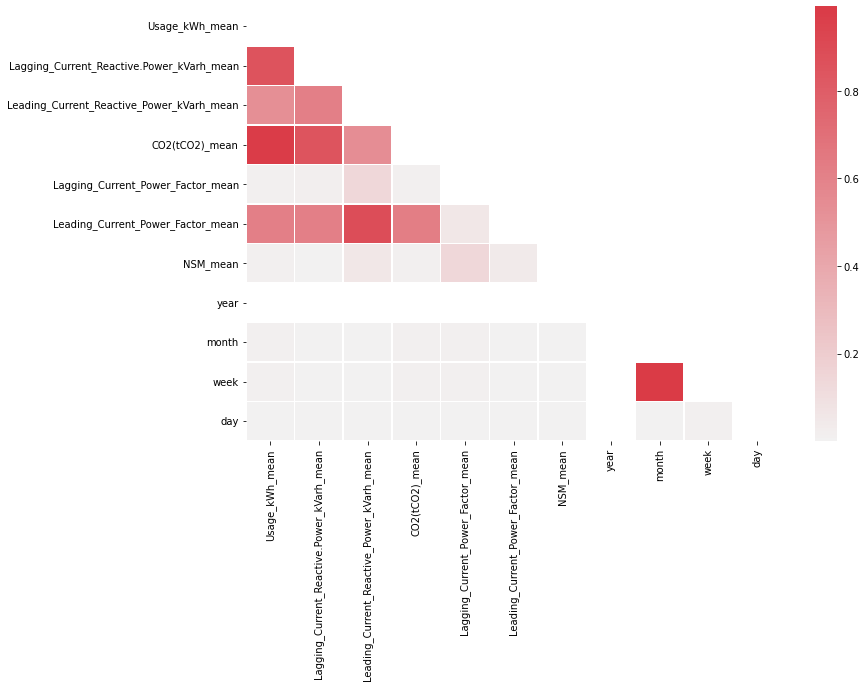

ATTENTION: The correlation plots show the linear correlations R², which go from 0 (none correlation) to 1 (perfect correlation). Obviously, the main diagonal always shows R² = 1, since the data is perfectly correlated to itself.

The returned correlation matrix, on the other hand, presents the linear coefficients of correlation R, not R². R values go from -1 (perfect negative correlation) to 1 (perfect positive correlation).

None of these coefficients take non-linear relations and the presence of a multiple linear correlation in account. For these cases, it is necessary to calculate R² adjusted, which takes in account the presence of multiple preditors and non-linearities.

Correlation matrix - numeric results:



,Usage_kWh_mean
Usage_kWh_mean,1.000000
CO2(tCO2)_mean,0.990229
Lagging_Current_Reactive.Power_kVarh_mean,0.927746
Leading_Current_Power_Factor_mean,0.787223
Lagging_Current_Power_Factor_mean,0.121468
NSM_mean,0.088490
day,-0.006126
week,-0.111758
month,-0.116878
Leading_Current_Reactive_Power_kVarh_mean,-0.730250


In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SHOW_MASKED_PLOT = True
#SHOW_MASKED_PLOT = True - keep as True if you want to see a cleaned version of the plot
# where a mask is applied. Alternatively, SHOW_MASKED_PLOT = True, or 
# SHOW_MASKED_PLOT = False

RESPONSES_TO_RETURN_CORR = "Usage_kWh_mean"
#RESPONSES_TO_RETURN_CORR - keep as None to return the full correlation tensor.
# If you want to display the correlations for a particular group of features, input them
# as a list, even if this list contains a single element. Examples:
# responses_to_return_corr = ['response1'] for a single response
# responses_to_return_corr = ['response1', 'response2', 'response3'] for multiple
# responses. Notice that 'response1',... should be substituted by the name ('string')
# of a column of the dataset that represents a response variable.
# WARNING: The returned coefficients will be ordered according to the order of the list
# of responses. i.e., they will be firstly ordered based on 'response1'
# Alternatively: a list containing strings (inside quotes) with the names of the response
# columns that you want to see the correlations. Declare as a list even if it contains a
# single element.

SET_RETURNED_LIMIT = None
# SET_RETURNED_LIMIT = None - This variable will only present effects in case you have
# provided a response feature to be returned. In this case, keep set_returned_limit = None
# to return all of the correlation coefficients; or, alternatively, 
# provide an integer number to limit the total of coefficients returned. 
# e.g. if set_returned_limit = 10, only the ten highest coefficients will be returned. 

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'correlation_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


#New dataframe saved as correlation_matrix. Simply modify this object on the left of equality:
correlation_matrix = ewf.correlation_plot (df = DATASET, show_masked_plot = SHOW_MASKED_PLOT, responses_to_return_corr = RESPONSES_TO_RETURN_CORR, set_returned_limit = SET_RETURNED_LIMIT, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

- Let's remove the missing value and the correlation of the response variable with itself.
- Let's keep only the R with absolute value higher or equal to 0.4

In [ ]:
correlation_matrix = correlation_matrix.dropna(how = 'any')
correlation_matrix = correlation_matrix[(abs(correlation_matrix['Usage_kWh_mean']) < 1) & (abs(correlation_matrix['Usage_kWh_mean']) >= 0.4)]
correlation_matrix

,Usage_kWh_mean
CO2(tCO2)_mean,0.990229
Lagging_Current_Reactive.Power_kVarh_mean,0.927746
Leading_Current_Power_Factor_mean,0.787223
Leading_Current_Reactive_Power_kVarh_mean,-0.730250


### **Plotting a bar chart**
- To obtain a **Pareto chart**, keep `aggregate_function = 'sum'`, `plot_cumulative_percent = True`, and `orientation = 'vertical'`.
- For obtaining the **data distribution of categorical variables**, select any numeric column as the response, and set `aggregate_function = 'count'`. You can also set `plot_cumulative_percent = True` to compare the frequencies of each possible value.

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable Usage_kWh_mean_mean.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Load_Type_mode,Usage_kWh_mean_mean,Usage_kWh_mean_mean_cumsum,Usage_kWh_mean_mean_cum_pct
0,Maximum_Load,33.664935,33.664935,36.872976
1,Medium_Load,32.713603,66.378538,72.703963
2,Light_Load,24.921214,91.299751,100.000000


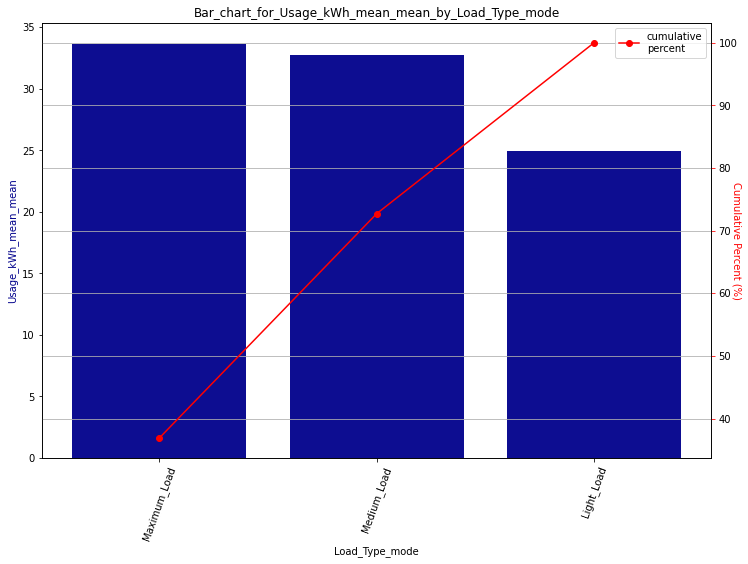

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Load_Type_mode'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name 
# of the column to be analyzed. e.g. 
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = 'Usage_kWh_mean'
# RESPONSE_VAR_NAME: string (inside quotes) containing the name 
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'mean'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation 
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or 
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if 
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df. 
# Simply modify this object on the left of equality:
aggregated_sorted_df = ewf.bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### Here, we can see that the mean usage of energy is highly dependent on the load mode. 

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable Usage_kWh_mean_sum.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Load_Type_mode,Usage_kWh_mean_sum,Usage_kWh_mean_sum_cumsum,Usage_kWh_mean_sum_cum_pct
0,Light_Load,5083.927583,5083.927583,63.573153
1,Medium_Load,1701.107333,6785.034917,84.845044
2,Maximum_Load,1211.937667,7996.972583,100.000000


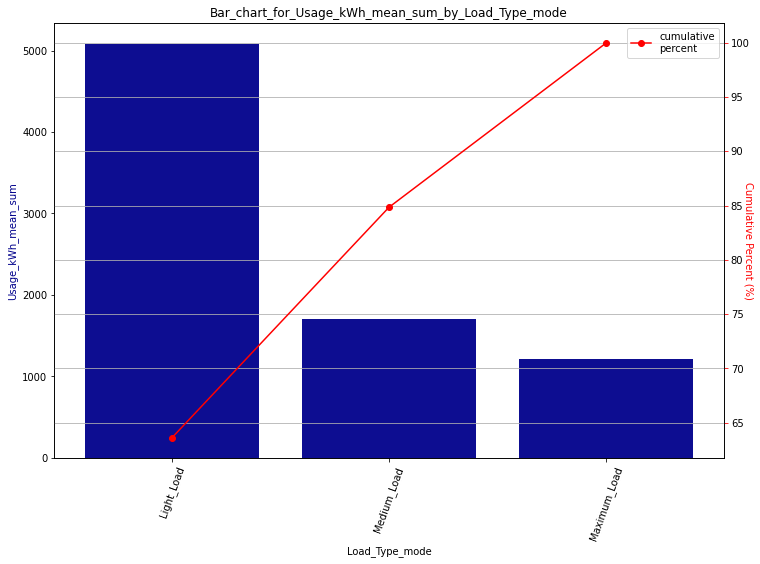

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Load_Type_mode'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name 
# of the column to be analyzed. e.g. 
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = 'Usage_kWh_mean'
# RESPONSE_VAR_NAME: string (inside quotes) containing the name 
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'sum'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation 
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or 
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if 
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df. 
# Simply modify this object on the left of equality:
aggregated_sorted_df = ewf.bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable count_of_entries.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Load_Type_mode,count_of_entries,count_of_entries_cumsum,count_of_entries_cum_pct
0,Light_Load,204,204,69.863014
1,Medium_Load,52,256,87.671233
2,Maximum_Load,36,292,100.000000


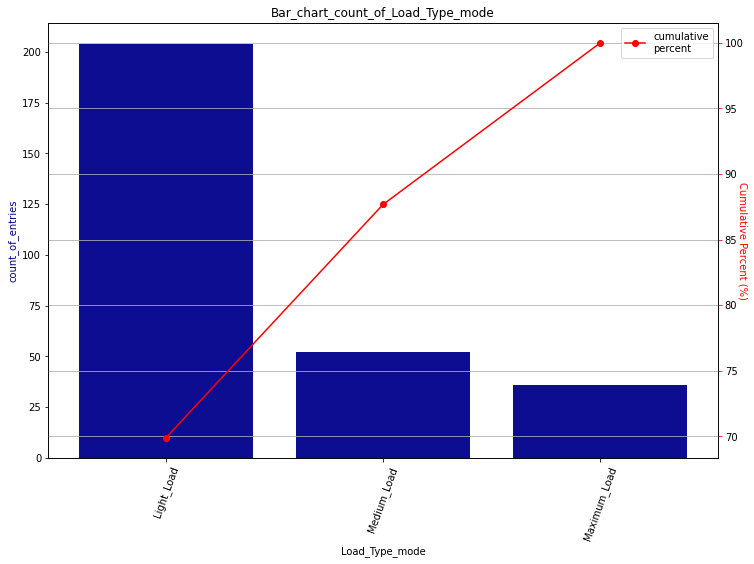

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Load_Type_mode'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name 
# of the column to be analyzed. e.g. 
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = 'Usage_kWh_mean'
# RESPONSE_VAR_NAME: string (inside quotes) containing the name 
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'count'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation 
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or 
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if 
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df. 
# Simply modify this object on the left of equality:
aggregated_sorted_df = ewf.bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# We can see that in mean and total energy consume, Maximum load presents the highest impacts.
- On the other hand, most of data corresponds to Light load

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable Usage_kWh_mean_mean.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Day_of_week_mode,Usage_kWh_mean_mean,Usage_kWh_mean_mean_cumsum,Usage_kWh_mean_mean_cum_pct
0,Thursday,33.878737,33.878737,17.590847
1,Tuesday,33.512575,67.391313,34.991572
2,Friday,33.193065,100.584378,52.226397
3,Wednesday,32.295023,132.879401,68.994932
4,Monday,29.243661,162.123062,84.179110
5,Saturday,19.298933,181.421995,94.199689
6,Sunday,11.170992,192.592987,100.000000


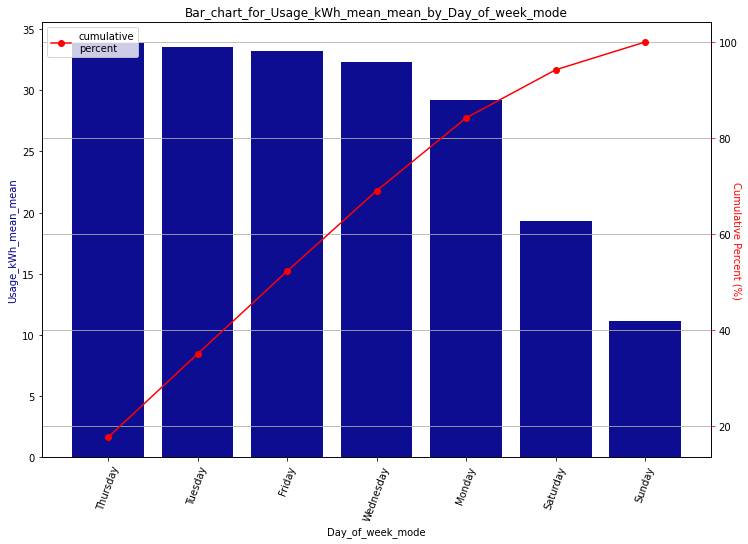

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Day_of_week_mode'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name 
# of the column to be analyzed. e.g. 
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = 'Usage_kWh_mean'
# RESPONSE_VAR_NAME: string (inside quotes) containing the name 
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'mean'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation 
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or 
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if 
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df. 
# Simply modify this object on the left of equality:
aggregated_sorted_df = ewf.bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable Usage_kWh_mean_sum.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Day_of_week_mode,Usage_kWh_mean_sum,Usage_kWh_mean_sum_cumsum,Usage_kWh_mean_sum_cum_pct
0,Tuesday,1407.528167,1407.528167,17.600763
1,Friday,1394.108750,2801.636917,35.033719
2,Thursday,1355.149500,4156.786417,51.979501
3,Wednesday,1291.800917,5448.587333,68.133125
4,Monday,1257.477417,6706.064750,83.857543
5,Saturday,810.555167,7516.619917,93.993319
6,Sunday,480.352667,7996.972583,100.000000


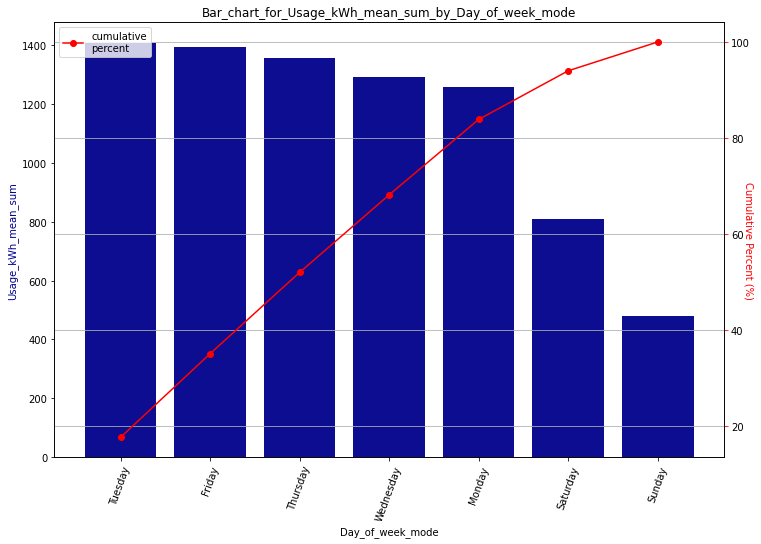

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Day_of_week_mode'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name 
# of the column to be analyzed. e.g. 
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = 'Usage_kWh_mean'
# RESPONSE_VAR_NAME: string (inside quotes) containing the name 
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'sum'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation 
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or 
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if 
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df. 
# Simply modify this object on the left of equality:
aggregated_sorted_df = ewf.bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

- We can see that the mean and total consume are not the same throughout the week and substantially decrease on weekend. Also, there is a great decrease from Saturday to Sunday.
- Interestingly, Thursday and Tuesday are the two days with more consume.

### **Obtaining scatter plots and simple linear regressions**

Let's recap the correlation matrix:

In [ ]:
correlation_matrix

,Usage_kWh_mean
CO2(tCO2)_mean,0.990229
Lagging_Current_Reactive.Power_kVarh_mean,0.927746
Leading_Current_Power_Factor_mean,0.787223
Leading_Current_Reactive_Power_kVarh_mean,-0.730250


3 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



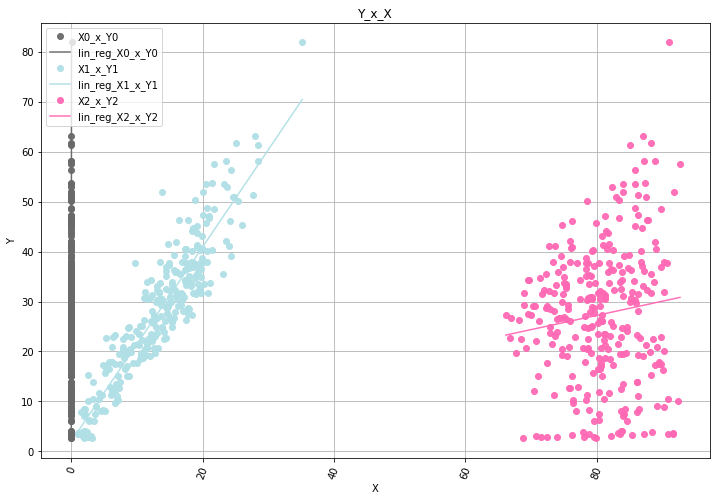


Linear regression summaries (equations and R²):

Linear regression summary for X0_x_Y0:



'y = 2075.22*x + 3.47'

'R²_lin_reg = 0.9806'



Linear regression summary for X1_x_Y1:



'y = 1.95*x + 2.03'

'R²_lin_reg = 0.8607'



Linear regression summary for X2_x_Y2:



'y = 0.28*x + 4.46'

'R²_lin_reg = 0.0148'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['CO2(tCO2)_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': dataset['Lagging_Current_Reactive.Power_kVarh_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': dataset['Lagging_Current_Power_Factor_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



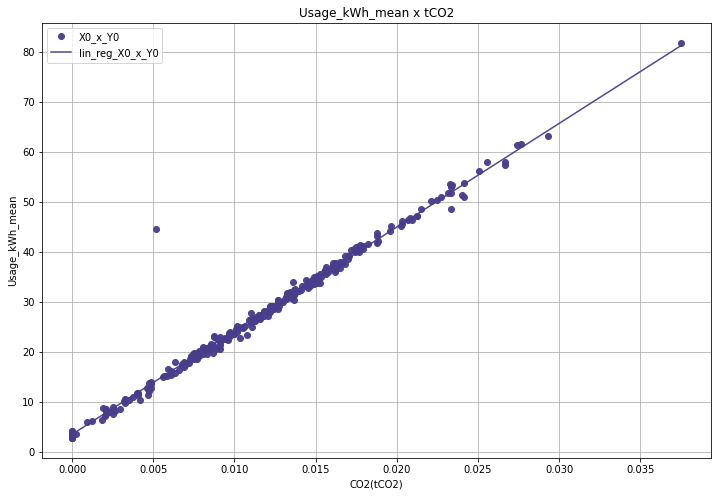


Linear regression summaries (equations and R²):

Linear regression summary for X0_x_Y0:



'y = 2075.22*x + 3.47'

'R²_lin_reg = 0.9806'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['CO2(tCO2)_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    #{'x': dataset['Lagging_Current_Reactive.Power_kVarh_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    #{'x': dataset['Lagging_Current_Power_Factor_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "CO2(tCO2)" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'Usage_kWh_mean' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Usage_kWh_mean x tCO2' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



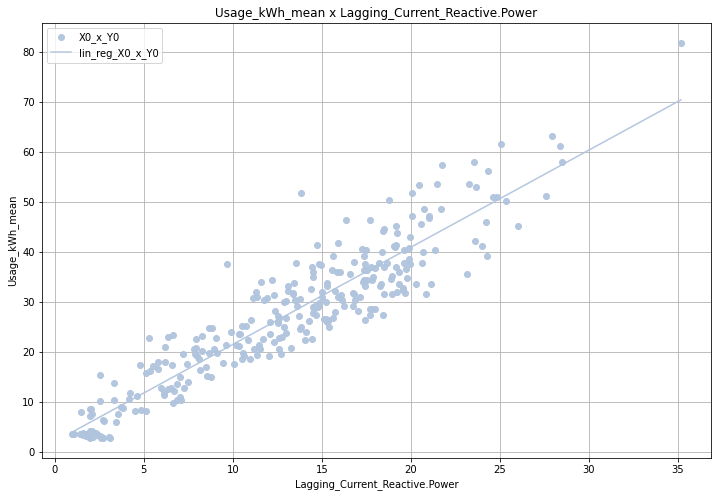


Linear regression summaries (equations and R²):

Linear regression summary for X0_x_Y0:



'y = 1.95*x + 2.03'

'R²_lin_reg = 0.8607'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['CO2(tCO2)_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': dataset['Lagging_Current_Reactive.Power_kVarh_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    #{'x': dataset['Lagging_Current_Power_Factor_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "Lagging_Current_Reactive.Power" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'Usage_kWh_mean' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Usage_kWh_mean x Lagging_Current_Reactive.Power' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



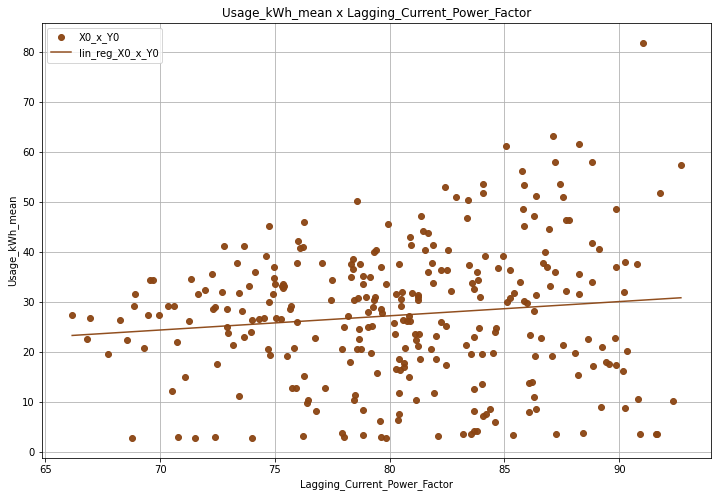


Linear regression summaries (equations and R²):

Linear regression summary for X0_x_Y0:



'y = 0.28*x + 4.46'

'R²_lin_reg = 0.0148'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['CO2(tCO2)_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    #{'x': dataset['Lagging_Current_Reactive.Power_kVarh_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': dataset['Lagging_Current_Power_Factor_mean'], 'y': dataset['Usage_kWh_mean'], 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "Lagging_Current_Power_Factor" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'Usage_kWh_mean' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Usage_kWh_mean x Lagging_Current_Power_Factor' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Visualizing time series**

In [ ]:
dataset.columns

Index(['timestamp_grouped', 'Usage_kWh_mean',
       'Lagging_Current_Reactive.Power_kVarh_mean',
       'Leading_Current_Reactive_Power_kVarh_mean', 'CO2(tCO2)_mean',
       'Lagging_Current_Power_Factor_mean',
       'Leading_Current_Power_Factor_mean', 'NSM_mean', 'WeekStatus_mode',
       'Day_of_week_mode', 'Load_Type_mode', 'year', 'month', 'week', 'day'],
      dtype='object')

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



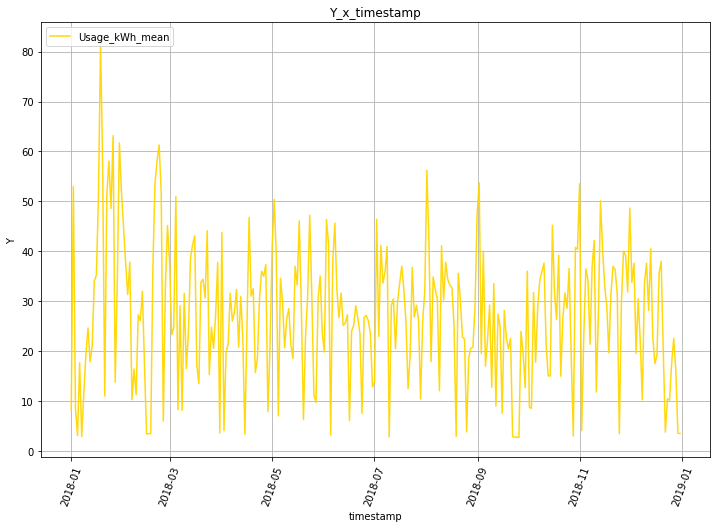

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['timestamp_grouped'], 'y': dataset['Usage_kWh_mean'], 'lab': 'Usage_kWh_mean'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



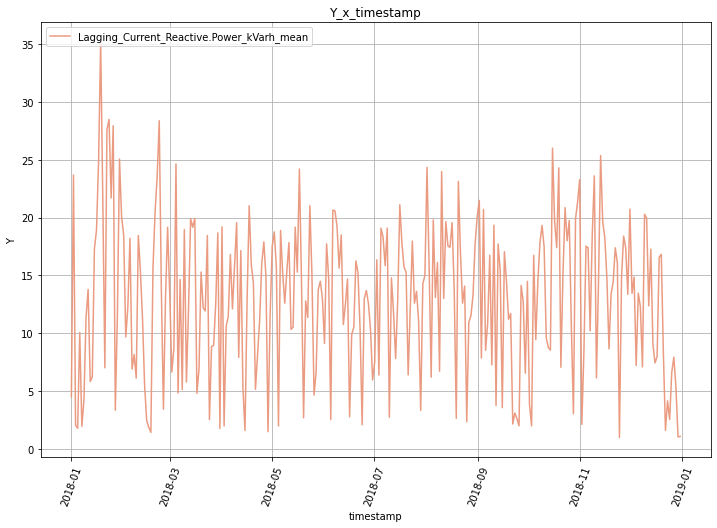

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['timestamp_grouped'], 'y': dataset['Lagging_Current_Reactive.Power_kVarh_mean'], 'lab': 'Lagging_Current_Reactive.Power_kVarh_mean'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



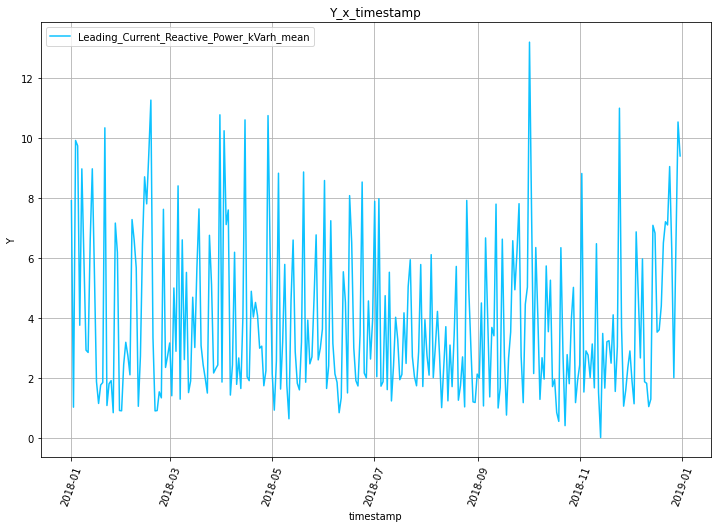

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['timestamp_grouped'], 'y': dataset['Leading_Current_Reactive_Power_kVarh_mean'], 'lab': 'Leading_Current_Reactive_Power_kVarh_mean'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



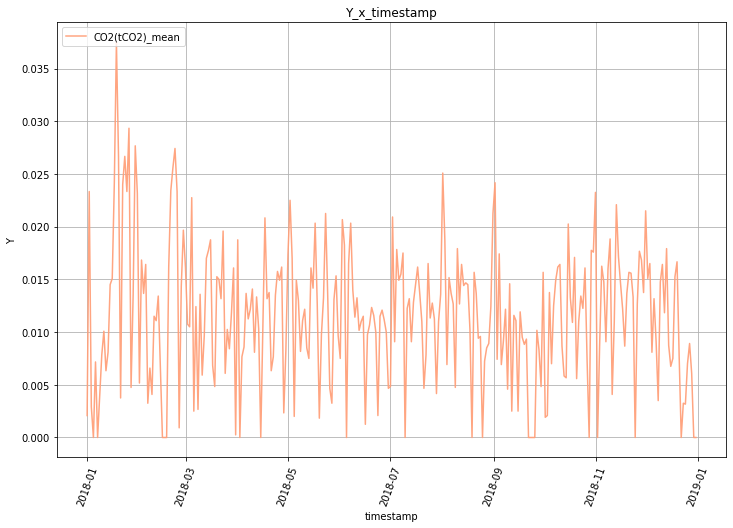

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['timestamp_grouped'], 'y': dataset['CO2(tCO2)_mean'], 'lab': 'CO2(tCO2)_mean'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



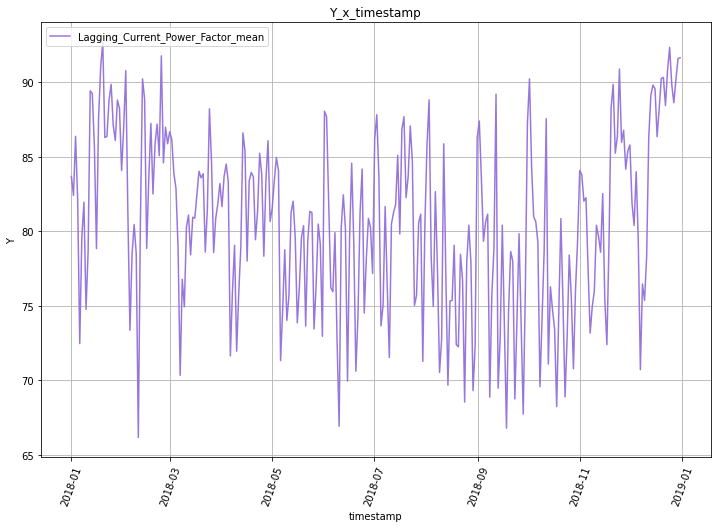

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['timestamp_grouped'], 'y': dataset['Lagging_Current_Power_Factor_mean'], 'lab': 'Lagging_Current_Power_Factor_mean'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



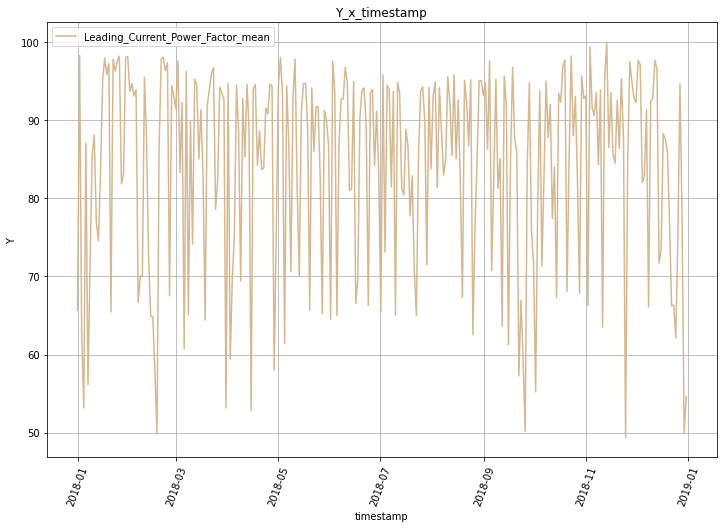

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['timestamp_grouped'], 'y': dataset['Leading_Current_Power_Factor_mean'], 'lab': 'Leading_Current_Power_Factor_mean'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



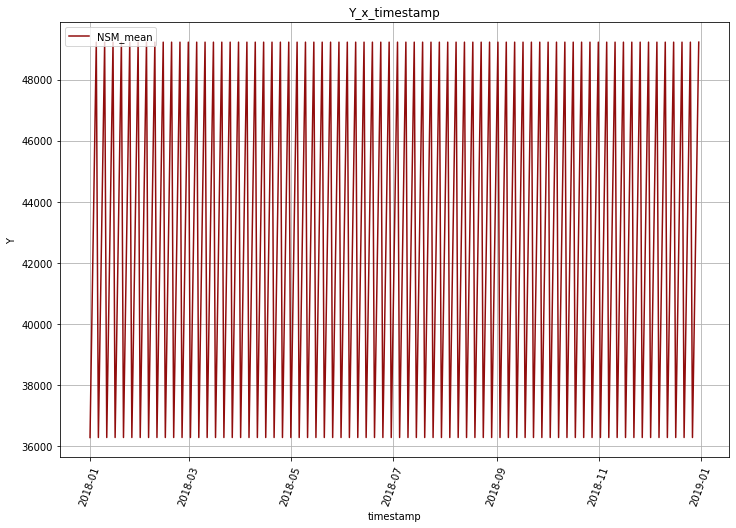

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['timestamp_grouped'], 'y': dataset['NSM_mean'], 'lab': 'NSM_mean'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Visualizing histograms**


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

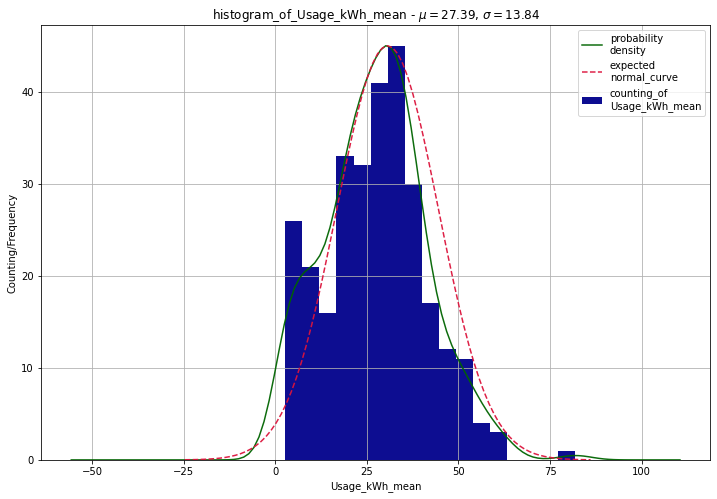

Check the general statistics from the analyzed variable:



,value
statistics,
mean,27.386892
median,27.812500
standard_deviation,13.843678
lowest_Usage_kWh_mean,2.725583
highest_Usage_kWh_mean,81.891417
count_of_values,292.000000
number_of_bins,18.000000
bin_size,4.656814
bin_of_max_proba,30.666466




Check the frequency table:



,bin_center,count
0,2.725583,26.0
1,7.382397,21.0
2,12.039211,16.0
3,16.696025,33.0
4,21.352838,32.0
5,26.009652,41.0
6,30.666466,45.0
7,35.323279,30.0
8,39.980093,17.0
9,44.636907,12.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'Usage_kWh_mean'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

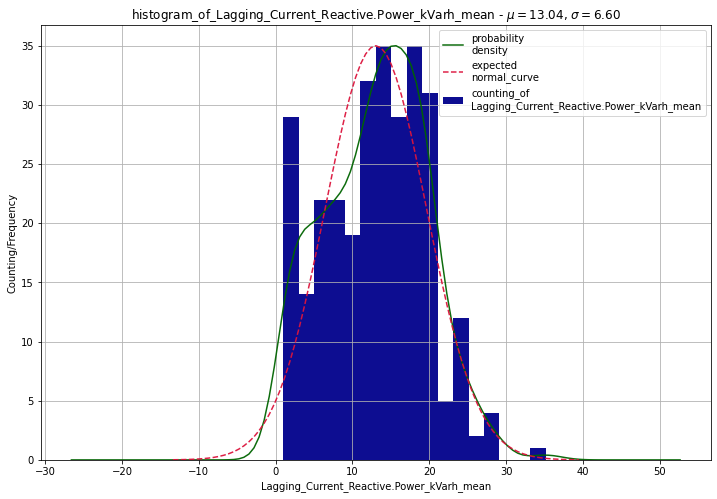

Check the general statistics from the analyzed variable:



,value
statistics,
mean,13.035384
median,13.574667
standard_deviation,6.601328
lowest_Lagging_Current_Reactive.Power_kVarh_mean,0.979417
highest_Lagging_Current_Reactive.Power_kVarh_mean,35.173250
count_of_values,292.000000
number_of_bins,18.000000
bin_size,2.011402
bin_of_max_proba,13.047828




Check the frequency table:



,bin_center,count
0,0.979417,29.0
1,2.990819,14.0
2,5.002221,22.0
3,7.013623,22.0
4,9.025025,19.0
5,11.036426,32.0
6,13.047828,35.0
7,15.059230,29.0
8,17.070632,35.0
9,19.082034,31.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'Lagging_Current_Reactive.Power_kVarh_mean'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

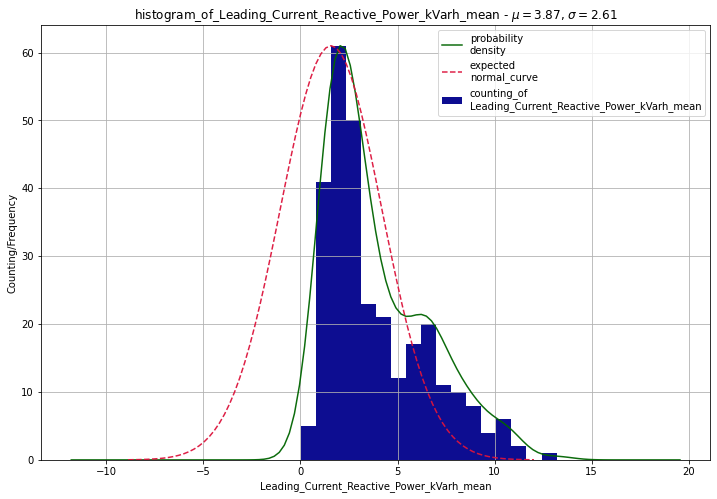

Check the general statistics from the analyzed variable:



,value
statistics,
mean,3.870949
median,2.921917
standard_deviation,2.612382
lowest_Leading_Current_Reactive_Power_kVarh_mean,0.026417
highest_Leading_Current_Reactive_Power_kVarh_mean,13.188583
count_of_values,292.000000
number_of_bins,18.000000
bin_size,0.774245
bin_of_max_proba,1.574907




Check the frequency table:



,bin_center,count
0,0.026417,5.0
1,0.800662,41.0
2,1.574907,61.0
3,2.349152,50.0
4,3.123397,23.0
5,3.897642,21.0
6,4.671887,12.0
7,5.446132,17.0
8,6.220377,20.0
9,6.994623,11.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'Leading_Current_Reactive_Power_kVarh_mean'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

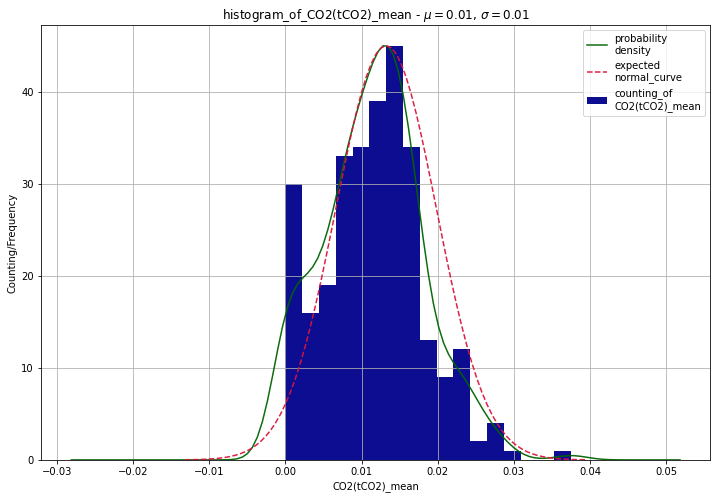

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.011524
median,0.011833
standard_deviation,0.006606
lowest_CO2(tCO2)_mean,0.000000
highest_CO2(tCO2)_mean,0.037500
count_of_values,292.000000
number_of_bins,18.000000
bin_size,0.002206
bin_of_max_proba,0.013235




Check the frequency table:



,bin_center,count
0,0.000000,30.0
1,0.002206,16.0
2,0.004412,19.0
3,0.006618,33.0
4,0.008824,34.0
5,0.011029,39.0
6,0.013235,45.0
7,0.015441,34.0
8,0.017647,13.0
9,0.019853,9.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'CO2(tCO2)_mean'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

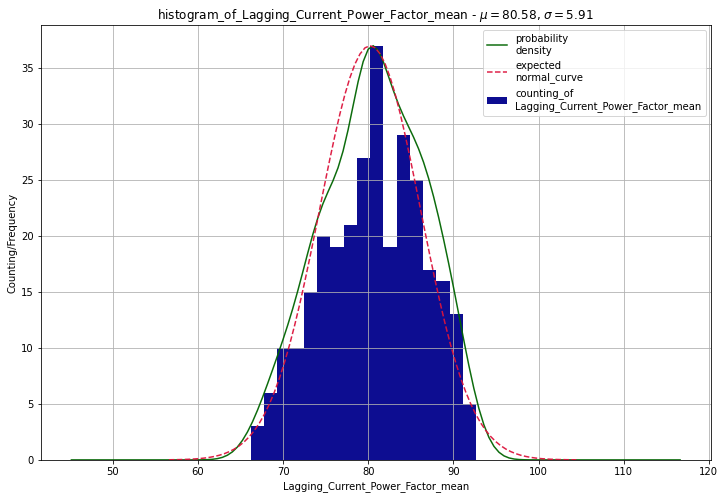

Check the general statistics from the analyzed variable:



,value
statistics,
mean,80.578056
median,80.648583
standard_deviation,5.909322
lowest_Lagging_Current_Power_Factor_mean,66.166583
highest_Lagging_Current_Power_Factor_mean,92.688333
count_of_values,292.000000
number_of_bins,18.000000
bin_size,1.560103
bin_of_max_proba,80.207510




Check the frequency table:



,bin_center,count
0,66.166583,3.0
1,67.726686,6.0
2,69.286789,10.0
3,70.846892,10.0
4,72.406995,15.0
5,73.967098,20.0
6,75.527201,19.0
7,77.087304,21.0
8,78.647407,27.0
9,80.207510,37.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'Lagging_Current_Power_Factor_mean'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

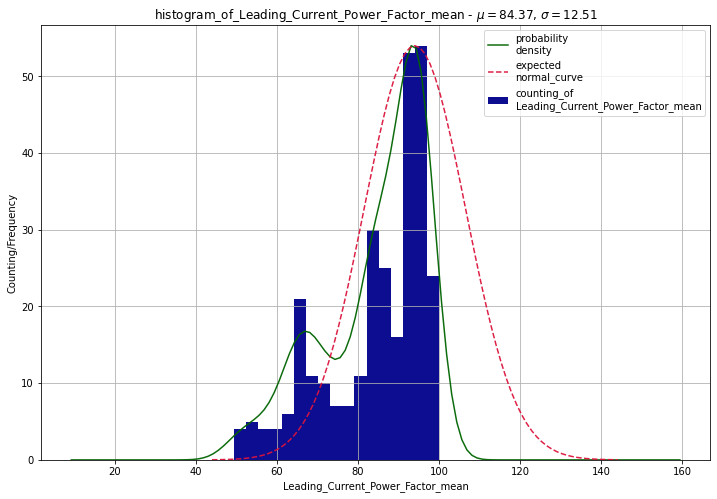

Check the general statistics from the analyzed variable:



,value
statistics,
mean,84.367870
median,88.194500
standard_deviation,12.509709
lowest_Leading_Current_Power_Factor_mean,49.373167
highest_Leading_Current_Power_Factor_mean,99.999333
count_of_values,292.000000
number_of_bins,18.000000
bin_size,2.978010
bin_of_max_proba,94.043314




Check the frequency table:



,bin_center,count
0,49.373167,4.0
1,52.351176,5.0
2,55.329186,4.0
3,58.307196,4.0
4,61.285206,6.0
5,64.263216,21.0
6,67.241225,11.0
7,70.219235,10.0
8,73.197245,7.0
9,76.175255,7.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'Leading_Current_Power_Factor_mean'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

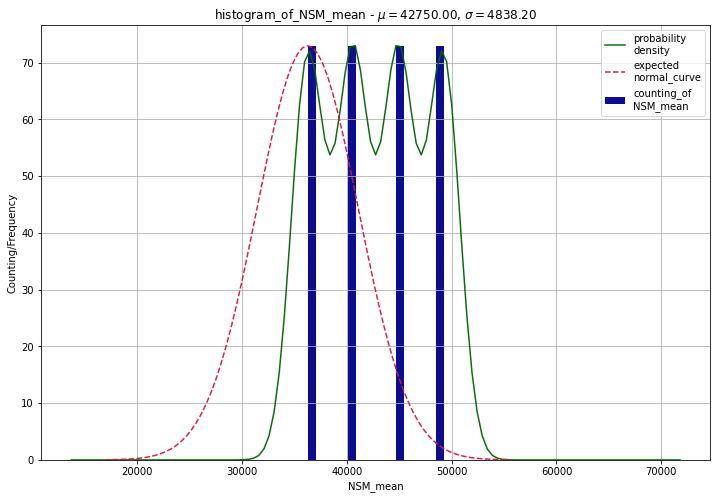

Check the general statistics from the analyzed variable:



,value
statistics,
mean,42750.000000
median,42750.000000
standard_deviation,4838.198523
lowest_NSM_mean,36270.000000
highest_NSM_mean,49230.000000
count_of_values,292.000000
number_of_bins,18.000000
bin_size,762.352941
bin_of_max_proba,36270.000000




Check the frequency table:



,bin_center,count
0,36270.000000,73.0
1,37032.352941,0.0
2,37794.705882,0.0
3,38557.058824,0.0
4,39319.411765,0.0
5,40081.764706,73.0
6,40844.117647,0.0
7,41606.470588,0.0
8,42368.823529,0.0
9,43131.176471,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'NSM_mean'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

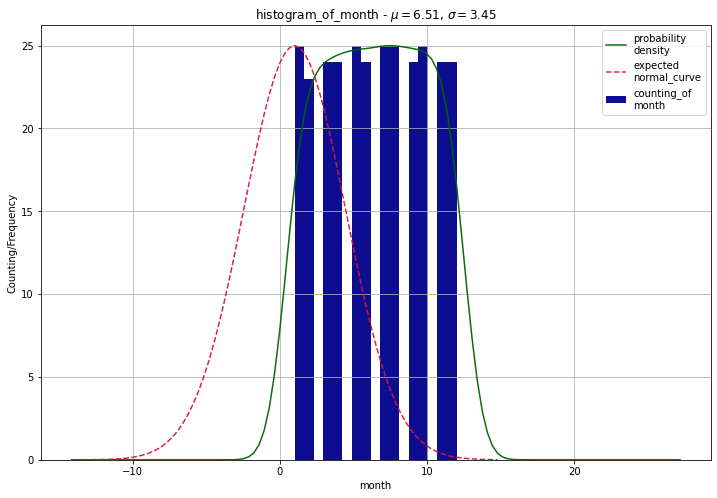

Check the general statistics from the analyzed variable:



,value
statistics,
mean,6.510274
median,7.000000
standard_deviation,3.447679
lowest_month,1.000000
highest_month,12.000000
count_of_values,292.000000
number_of_bins,18.000000
bin_size,0.647059
bin_of_max_proba,1.000000




Check the frequency table:



,bin_center,count
0,1.000000,25.0
1,1.647059,23.0
2,2.294118,0.0
3,2.941176,24.0
4,3.588235,24.0
5,4.235294,0.0
6,4.882353,25.0
7,5.529412,24.0
8,6.176471,0.0
9,6.823529,25.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'month'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

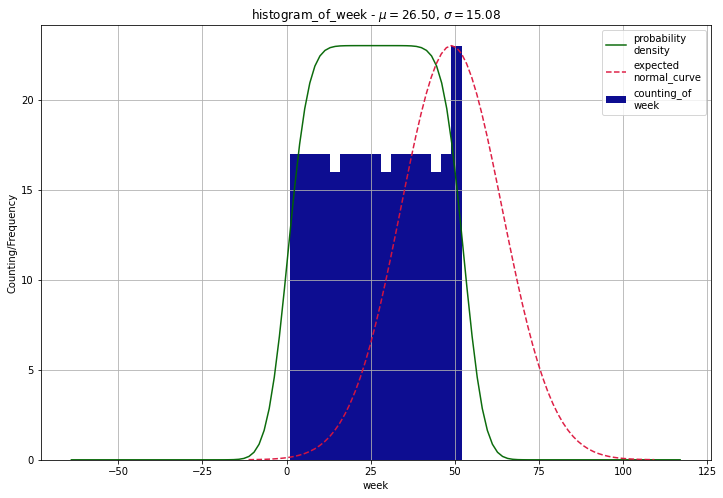

Check the general statistics from the analyzed variable:



,value
statistics,
mean,26.500000
median,26.500000
standard_deviation,15.075184
lowest_week,1.000000
highest_week,52.000000
count_of_values,292.000000
number_of_bins,18.000000
bin_size,3.000000
bin_of_max_proba,49.000000




Check the frequency table:



,bin_center,count
0,1.0,17.0
1,4.0,17.0
2,7.0,17.0
3,10.0,17.0
4,13.0,16.0
5,16.0,17.0
6,19.0,17.0
7,22.0,17.0
8,25.0,17.0
9,28.0,16.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'week'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 17 bins.



<Figure size 432x288 with 0 Axes>

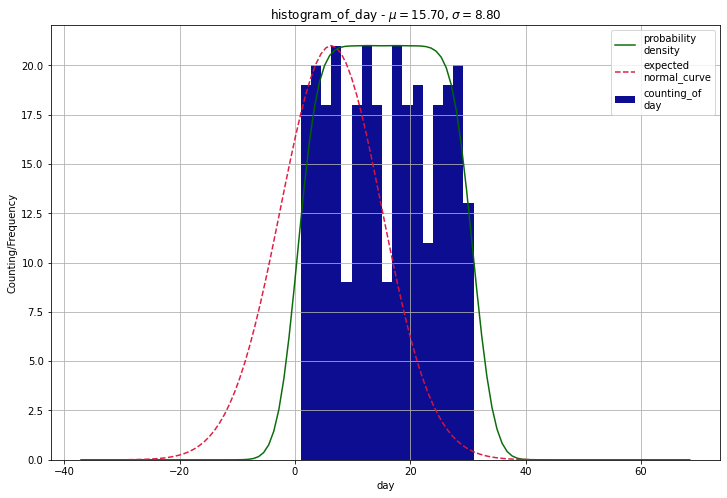

Check the general statistics from the analyzed variable:



,value
statistics,
mean,15.695205
median,16.000000
standard_deviation,8.798210
lowest_day,1.000000
highest_day,31.000000
count_of_values,292.000000
number_of_bins,18.000000
bin_size,1.764706
bin_of_max_proba,6.294118




Check the frequency table:



,bin_center,count
0,1.000000,19.0
1,2.764706,20.0
2,4.529412,18.0
3,6.294118,21.0
4,8.058824,9.0
5,9.823529,18.0
6,11.588235,21.0
7,13.352941,18.0
8,15.117647,9.0
9,16.882353,21.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 17
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# We see that grouping made rge distributions closer to the normal curve.

### **Filtering (selecting); ordering; or renaming columns from the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

MODE = 'select_or_order_columns'
# MODE = 'select_or_order_columns' for filtering only the list of columns passed as COLUMNS_LIST,
# and setting a new column order. In this mode, you can pass the columns in any order: 
# the order of elements on the list will be the new order of columns.

# MODE = 'rename_columns' for renaming the columns with the names passed as COLUMNS_LIST. In this
# mode, the list must have same length and same order of the columns of the dataframe. That is because
# the columns will sequentially receive the names in the list. So, a mismatching of positions
# will result into columns with incorrect names.

COLUMNS_LIST = ['timestamp_grouped', 'month', 'week', 'day', 'Day_of_week_mode', 'Load_Type_mode', 'Lagging_Current_Reactive.Power_kVarh_mean',
       'Leading_Current_Reactive_Power_kVarh_mean', 'CO2(tCO2)_mean',
       'Lagging_Current_Power_Factor_mean',
       'Leading_Current_Power_Factor_mean', 'NSM_mean', 'Usage_kWh_mean']
# COLUMNS_LIST = list of strings containing the names (headers) of the columns to select
# (filter); or to be set as the new columns' names, according to the selected mode.
# For instance: COLUMNS_LIST = ['col1', 'col2', 'col3'] will 
# select columns 'col1', 'col2', and 'col3' (or rename the columns with these names). 
# Declare the names inside quotes.
# Simply substitute the list by the list of columns that you want to select; or the
# list of the new names you want to give to the dataset columns.

# New dataframe saved as new_df. Simply modify this object on the left of equality:
dataset = ewf.select_order_or_rename_columns (df = DATASET, columns_list = COLUMNS_LIST, mode = MODE)

Original columns in the dataframe:
Index(['timestamp_grouped', 'Usage_kWh_mean',
       'Lagging_Current_Reactive.Power_kVarh_mean',
       'Leading_Current_Reactive_Power_kVarh_mean', 'CO2(tCO2)_mean',
       'Lagging_Current_Power_Factor_mean',
       'Leading_Current_Power_Factor_mean', 'NSM_mean', 'WeekStatus_mode',
       'Day_of_week_mode', 'Load_Type_mode', 'year', 'month', 'week', 'day'],
      dtype='object')

Dataframe filtered according to the list provided.

Check the new dataframe:



,timestamp_grouped,month,week,day,Day_of_week_mode,Load_Type_mode,Lagging_Current_Reactive.Power_kVarh_mean,Leading_Current_Reactive_Power_kVarh_mean,CO2(tCO2)_mean,Lagging_Current_Power_Factor_mean,Leading_Current_Power_Factor_mean,NSM_mean,Usage_kWh_mean
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


# Since all data is from 2018, we removed the column year

### **Renaming specific columns from the dataframe; or cleaning columns' labels**
- The function `select_order_or_rename_columns` requires the user to pass a list containing the names from all columns.
- Also, this list must contain the columns in the correct order (the order they appear in the dataframe).
- This function may manipulate one or several columns by call, and is not dependent on their order.
- This function can also be used for cleaning the columns' labels: capitalize (upper case) or lower cases of all columns' names; replace substrings on columns' names; or eliminating trailing and leading white spaces or characters from columns' labels.

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

MODE = 'lowercase_columns'
# MODE = 'set_new_names' will change the columns according to the specifications in
# LIST_OF_COLUMNS_LABELS.

# MODE = 'capitalize_columns' will capitalize all columns names (i.e., they will be put in
# upper case). e.g. a column named 'column' will be renamed as 'COLUMN'

# MODE = 'lowercase_columns' will lower the case of all columns names. e.g. a column named
# 'COLUMN' will be renamed as 'column'.

# MODE = 'replace_substring' will search on the columns names (strings) for the 
# SUBSTRING_TO_BE_REPLACED (which may be a character or a string); and will replace it by 
# NEW_SUBSTRING_FOR_REPLACEMENT (which again may be either a character or a string). 
# Numbers (integers or floats) will be automatically converted into strings.
# As an example, consider the default situation where we search for a whitespace ' ' and replace it
# by underscore '_': SUBSTRING_TO_BE_REPLACED = ' ', NEW_SUBSTRING_FOR_REPLACEMENT = '_'  
# In this case, a column named 'new column' will be renamed as 'new_column'.

# MODE = 'trim' will remove all trailing or leading whitespaces from column names.
# e.g. a column named as ' col1 ' will be renamed as 'col1'; 'col2 ' will be renamed as
# 'col2'; and ' col3' will be renamed as 'col3'.

# MODE = 'eliminate_trailing_characters' will eliminate a defined trailing and leading 
# substring from the columns' names. 
# The substring must be indicated as TRAILING_SUBSTRING, and its default, when no value
# is provided, is equivalent to mode = 'trim' (eliminate white spaces). 
# e.g., if TRAILING_SUBSTRING = '_test' and you have a column named 'col_test', it will be 
# renamed as 'col'.

SUBSTRING_TO_BE_REPLACED = ' '
NEW_SUBSTRING_FOR_REPLACEMENT = '_'

TRAILING_SUBSTRING = None

LIST_OF_COLUMNS_LABELS = [
    
    {'column_name': None, 'new_column_name': None}, 
    {'column_name': None, 'new_column_name': None},
    {'column_name': None, 'new_column_name': None}, 
    {'column_name': None, 'new_column_name': None},
    {'column_name': None, 'new_column_name': None}, 
    {'column_name': None, 'new_column_name': None},
    {'column_name': None, 'new_column_name': None}, 
    {'column_name': None, 'new_column_name': None}, 
    {'column_name': None, 'new_column_name': None},
    {'column_name': None, 'new_column_name': None}, 
    {'column_name': None, 'new_column_name': None}
    
]
# LIST_OF_COLUMNS_LABELS = [{'column_name': None, 'new_column_name': None}]
# This is a list of dictionaries, where each dictionary contains two key-value pairs:
# the first one contains the original column name; and the second one contains the new name
# that will substitute the original one. The function will loop through all dictionaries in
# this list, access the values of the keys 'column_name', and it will be replaced (switched) 
# by the correspondent value in key 'new_column_name'.
    
# The object LIST_OF_COLUMNS_LABELS must be declared as a list, 
# in brackets, even if there is a single dictionary.
# Use always the same keys: 'column_name' for the original label; 
# and 'new_column_name', for the correspondent new label.
# Notice that this function will not search substrings: it will substitute a value only when
# there is perfect correspondence between the string in 'column_name' and one of the columns
# labels. So, the cases (upper or lower) must be the same.
    
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to replace more
# values.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'column_name': original_col, 'new_column_name': new_col}, 
# where original_col and new_col represent the strings for searching and replacement 
# (If one of the keys contains None, the new dictionary will be ignored).
# Example: LIST_OF_COLUMNS_LABELS = [{'column_name': 'col1', 'new_column_name': 'col'}] will
# rename 'col1' as 'col'.


# New dataframe saved as new_df. Simply modify this object on the left of equality:
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

MODE = 'trim'
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

MODE = 'replace_substring'
SUBSTRING_TO_BE_REPLACED = '('
NEW_SUBSTRING_FOR_REPLACEMENT = '_'
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)

DATASET = dataset #Alternatively: object containing the dataset to be analyzed
MODE = 'replace_substring'
SUBSTRING_TO_BE_REPLACED = ')'
NEW_SUBSTRING_FOR_REPLACEMENT = ''
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)

DATASET = dataset #Alternatively: object containing the dataset to be analyzed
MODE = 'replace_substring'
SUBSTRING_TO_BE_REPLACED = '.'
NEW_SUBSTRING_FOR_REPLACEMENT = '_'
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)

DATASET = dataset #Alternatively: object containing the dataset to be analyzed
MODE = 'replace_substring'
SUBSTRING_TO_BE_REPLACED = '_mode'
NEW_SUBSTRING_FOR_REPLACEMENT = ''
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)

DATASET = dataset #Alternatively: object containing the dataset to be analyzed
MODE = 'replace_substring'
SUBSTRING_TO_BE_REPLACED = '_mean'
NEW_SUBSTRING_FOR_REPLACEMENT = ''
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)

DATASET = dataset #Alternatively: object containing the dataset to be analyzed
MODE = 'replace_substring'
SUBSTRING_TO_BE_REPLACED = '_grouped'
NEW_SUBSTRING_FOR_REPLACEMENT = ''
dataset = ewf.rename_or_clean_columns_labels (df = DATASET, mode = MODE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, trailing_substring = TRAILING_SUBSTRING, list_of_columns_labels = LIST_OF_COLUMNS_LABELS)


Finished renaming dataframe columns.

Check the new dataframe:



,timestamp_grouped,month,week,day,day_of_week_mode,load_type_mode,lagging_current_reactive.power_kvarh_mean,leading_current_reactive_power_kvarh_mean,co2(tco2)_mean,lagging_current_power_factor_mean,leading_current_power_factor_mean,nsm_mean,usage_kwh_mean
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


Finished renaming dataframe columns.

Check the new dataframe:



,timestamp_grouped,month,week,day,day_of_week_mode,load_type_mode,lagging_current_reactive.power_kvarh_mean,leading_current_reactive_power_kvarh_mean,co2(tco2)_mean,lagging_current_power_factor_mean,leading_current_power_factor_mean,nsm_mean,usage_kwh_mean
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


Finished renaming dataframe columns.

Check the new dataframe:



/content/etl.py:11968: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  substring_replaced_series = (pd.Series(DATASET.columns)).str.replace(substring_to_be_replaced, new_substring_for_replacement)


,timestamp_grouped,month,week,day,day_of_week_mode,load_type_mode,lagging_current_reactive.power_kvarh_mean,leading_current_reactive_power_kvarh_mean,co2_tco2)_mean,lagging_current_power_factor_mean,leading_current_power_factor_mean,nsm_mean,usage_kwh_mean
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


Finished renaming dataframe columns.

Check the new dataframe:



/content/etl.py:11968: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  substring_replaced_series = (pd.Series(DATASET.columns)).str.replace(substring_to_be_replaced, new_substring_for_replacement)


,timestamp_grouped,month,week,day,day_of_week_mode,load_type_mode,lagging_current_reactive.power_kvarh_mean,leading_current_reactive_power_kvarh_mean,co2_tco2_mean,lagging_current_power_factor_mean,leading_current_power_factor_mean,nsm_mean,usage_kwh_mean
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


Finished renaming dataframe columns.

Check the new dataframe:



/content/etl.py:11968: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  substring_replaced_series = (pd.Series(DATASET.columns)).str.replace(substring_to_be_replaced, new_substring_for_replacement)


,timestamp_grouped,month,week,day,day_of_week_mode,load_type_mode,lagging_current_reactive_power_kvarh_mean,leading_current_reactive_power_kvarh_mean,co2_tco2_mean,lagging_current_power_factor_mean,leading_current_power_factor_mean,nsm_mean,usage_kwh_mean
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


Finished renaming dataframe columns.

Check the new dataframe:



,timestamp_grouped,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh_mean,leading_current_reactive_power_kvarh_mean,co2_tco2_mean,lagging_current_power_factor_mean,leading_current_power_factor_mean,nsm_mean,usage_kwh_mean
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


Finished renaming dataframe columns.

Check the new dataframe:



,timestamp_grouped,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


Finished renaming dataframe columns.

Check the new dataframe:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2018-12-25 18:00:00,12,52,25,Wednesday,Light_Load,6.610583,6.287667,0.007000,89.844500,75.105167,49230.0,17.461583
288,2018-12-27 00:00:00,12,52,27,Thursday,Light_Load,7.930667,2.017250,0.008917,88.623500,94.682417,36270.0,22.575917
289,2018-12-28 06:00:00,12,52,28,Friday,Light_Load,5.350250,6.422667,0.006083,90.161000,77.643417,40590.0,16.224500
290,2018-12-29 12:00:00,12,52,29,Sunday,Light_Load,1.034333,10.530583,0.000000,91.590750,50.015583,44910.0,3.579417


### **Removing duplicate rows from the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

LIST_OF_COLUMNS_TO_ANALYZE = None
# if LIST_OF_COLUMNS_TO_ANALYZE = None, the whole dataset will be analyzed, i.e., rows
# will be removed only if they have same values for all columns from the dataset.
# Alternatively, pass a list of columns names (strings), if you want to remove rows with
# same values for that combination of columns. Pass it as a list, even if there is a single column
# being declared.
# e.g. LIST_OF_COLUMNS_TO_ANALYZE = ['column1'] will check only 'column1'. Entries with same value
# on 'column1' will be considered duplicates and will be removed.
# LIST_OF_COLUMNS_TO_ANALYZE = ['col1', 'col2',  'col3'] will analyze the combination of 3 columns:
# 'col1', 'col2', and 'col3'. Only rows with same value for these 3 columns will be considered
# duplicates and will be removed.

WHICH_ROW_TO_KEEP = 'first'
# WHICH_ROW_TO_KEEP = 'first' will keep the first detected row and remove all other duplicates. If
# None or an invalid string is input, this method will be selected.
# WHICH_ROW_TO_KEEP = 'last' will keep only the last detected duplicate row, and remove all the others.
    
RESET_INDEX_AFTER_DROP = True
# RESET_INDEX_AFTER_DROP = True. keep it True to restarting the indexing numeration after dropping.
# Alternatively, set RESET_INDEX_AFTER_DROP = False to keep the original numeration (the removed indices
# will be missing).

# New dataframe saved as cleaned_df. Simply modify this object on the left of equality:
dataset = ewf.remove_duplicate_rows (df = DATASET, list_of_columns_to_analyze = LIST_OF_COLUMNS_TO_ANALYZE, which_row_to_keep = WHICH_ROW_TO_KEEP, reset_index_after_drop = RESET_INDEX_AFTER_DROP)

The rows with duplicate entries were successfully removed.
Only the first one of the duplicate entries was kept in the dataset.

The indices of the dataset were successfully restarted.

Check the 10 first rows from the returned dataset:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
5,2018-01-07 06:00:00,1,1,7,Sunday,Light_Load,1.941167,8.969417,0.000000,79.630083,56.142750,40590.0,2.919500
6,2018-01-08 12:00:00,1,2,8,Saturday,Light_Load,4.221583,6.002417,0.004000,81.949833,71.512000,44910.0,11.701583
7,2018-01-09 18:00:00,1,2,9,Monday,Medium_Load,11.358417,2.933583,0.007833,74.765583,85.589917,49230.0,19.334250
8,2018-01-11 00:00:00,1,2,11,Thursday,Light_Load,13.786833,2.857833,0.010083,78.643500,88.090083,36270.0,24.649333
9,2018-01-12 06:00:00,1,2,12,Saturday,Light_Load,5.814083,6.602500,0.006333,89.418750,76.928667,40590.0,17.879250


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset_cleaned_30h_avg"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset_cleaned_30h_avg exported as CSV file to notebook's workspace as 'dataset_cleaned_30h_avg.csv'.


## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 2: download a file from Colab's workspace

In [ ]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "dataset_cleaned_30h_avg.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File dataset_cleaned_30h_avg.csv successfully downloaded from Colab environment.


****